# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = input_file_directory + "mefs/glucose_lactate/"

# II] Glucose

In [6]:
experiments = "_exp1", "_exp2"
dfs_dmso_l = []
dfs_baf_l = []

for experiment in experiments:
    file_n = "glucose" + experiment + ".csv"
    df = pandas.read_csv(path + file_n, sep = ";") #download
    print(df, '\n')
    
    df = df.T #transpose
    df.reset_index(inplace=True) #reset index
    df.iloc[2:,:] = df.iloc[2:,:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df.iloc[2:,:] = df.iloc[2:,:].astype(float)
    
    df_dmso = df.iloc[:,:4]
    df_dmso.columns = df_dmso.iloc[1]
    df_dmso = df_dmso.drop(df_dmso.index[0:2])
    df_dmso.loc['mean()'] = df_dmso.mean() #mean for technical duplicate
    df_dmso = df_dmso.loc['mean()':,:] #select the mean
    dfs_dmso_l.append(df_dmso)

    df_baf = df.iloc[:,4:]
    df_baf.columns = df_baf.iloc[1]
    df_baf = df_baf.drop(df_baf.index[0:2])
    df_baf.loc['mean()'] = df_baf.mean() #mean for technical duplicate
    df_baf = df_baf.loc['mean()':,:] #select the mean row
    dfs_baf_l.append(df_baf)

#concat the three experiments
dfs_glu_dmso = pandas.concat([dfs_dmso_l[0], dfs_dmso_l[1]], axis=0) 
dfs_glu_baf  = pandas.concat([dfs_baf_l[0], dfs_baf_l[1]], axis=0)

dfs_glu_dmso

   DMSO    WT  2,285627903  2,367087339
0  DMSO    EV  1,892740779  1,909989799
1  DMSO  iso1  2,137051576  2,063587002
2  DMSO  iso2  2,186799436  2,192979329
3   BAF    WT  2,137009214  2,093682721
4   BAF    EV   1,65803912  1,663249908
5   BAF  iso1  1,494734427  1,593197596
6   BAF  iso2  1,728111004  1,793055451 

   DMSO    WT   1,64650121  1,708473456
0  DMSO    EV  2,036298082  2,036298082
1  DMSO  iso1  1,290138313  1,288603043
2  DMSO  iso2  2,260724623  2,272345588
3   BAF    WT  1,636235222  1,691514548
4   BAF    EV  1,564893044  1,516080145
5   BAF  iso1  1,241719623  1,254805661
6   BAF  iso2  2,168122671          NaN 



1,WT,EV,iso1,iso2
mean(),2.32636,1.90137,2.10032,2.18989
mean(),1.67749,2.0363,1.28937,2.26654



   cells     value        x
0    WT  2.326358  Glucose
1    WT  1.677487  Glucose
2    EV  1.901365  Glucose
3    EV  2.036298  Glucose
4  iso1  2.100319  Glucose
5  iso1  1.289371  Glucose
6  iso2  2.189889  Glucose
7  iso2  2.266535  Glucose

   cells     value        x
0    WT  2.115346  Glucose
1    WT  1.663875  Glucose
2    EV  1.660645  Glucose
3    EV  1.540487  Glucose
4  iso1  1.543966  Glucose
5  iso1  1.248263  Glucose
6  iso2  1.760583  Glucose
7  iso2  2.168123  Glucose


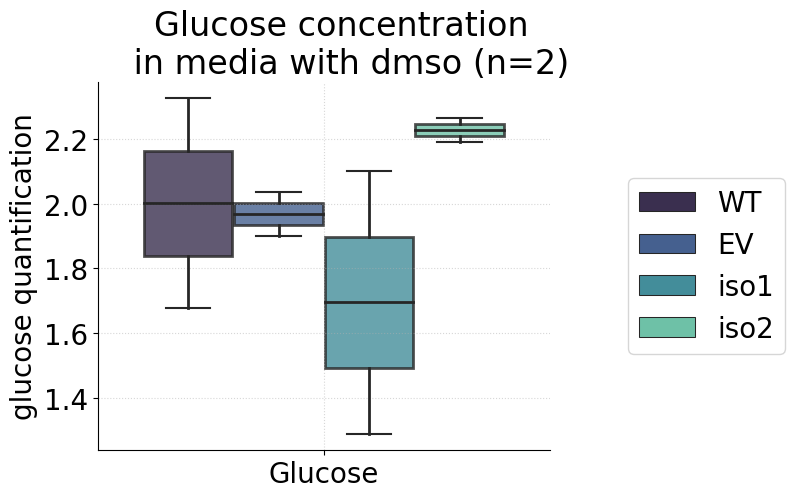

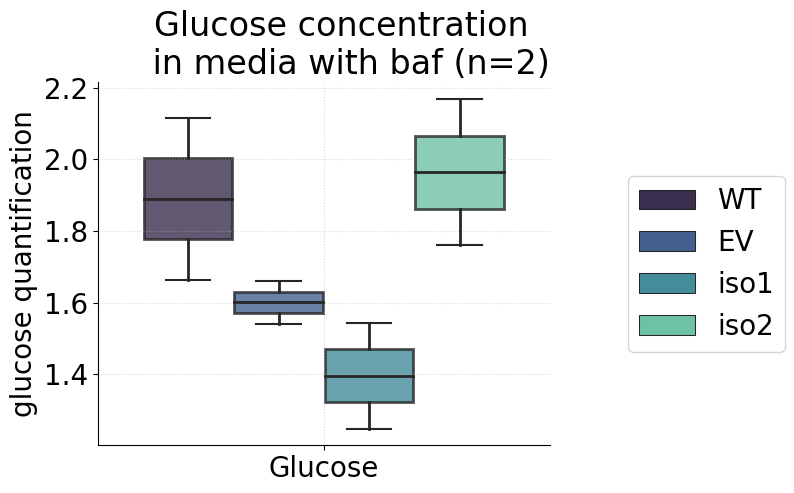

In [9]:
dfs = dfs_glu_dmso, dfs_glu_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df['value'] = df['value'].astype(float)
    df['x'] = 'Glucose'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('glucose quantification')
    plt.xlabel('')
    plt.title('Glucose concentration \n in media with '+ info + ' (n=2)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))  

# I] Lactate

In [10]:
experiments = "_exp1", "_exp2"
dfs_dmso_l = []
dfs_baf_l = []

for experiment in experiments:
    file_n = "lactate" + experiment + ".csv"
    df = pandas.read_csv(path + file_n, sep = ";") #download
    print(df, '\n')
    
    df = df.T #transpose
    df.reset_index(inplace=True) #reset index
    df.iloc[2:,:] = df.iloc[2:,:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df.iloc[2:,:] = df.iloc[2:,:].astype(float)
    
    df_dmso = df.iloc[:,:4]
    df_dmso.columns = df_dmso.iloc[1]
    df_dmso = df_dmso.drop(df_dmso.index[0:2])
    df_dmso.loc['mean()'] = df_dmso.mean() #mean for technical duplicate
    df_dmso = df_dmso.loc['mean()':,:] #select the mean
    dfs_dmso_l.append(df_dmso)

    df_baf = df.iloc[:,4:]
    df_baf.columns = df_baf.iloc[1]
    df_baf = df_baf.drop(df_baf.index[0:2])
    df_baf.loc['mean()'] = df_baf.mean() #mean for technical duplicate
    df_baf = df_baf.loc['mean()':,:] #select the mean row
    dfs_baf_l.append(df_baf)

#concat the three experiments
dfs_lact_dmso = pandas.concat([dfs_dmso_l[0], dfs_dmso_l[1]], axis=0) 
dfs_lact_baf  = pandas.concat([dfs_baf_l[0], dfs_baf_l[1]], axis=0)

dfs_lact_dmso

   DMSO    WT  2,975465182   2,90957878  2,915748744
0  DMSO    EV  2,361937633  2,423438021          NaN
1  DMSO  iso1  2,678644617  2,689600219          NaN
2  DMSO  iso2  2,941954624  2,898666563  2,918064515
3   BAF    WT  2,631933543  2,676204588          NaN
4   BAF    EV  2,108213649  2,049431856  2,068559265
5   BAF  iso1  1,944974047  1,972448752          NaN
6   BAF  iso2  2,429189892  2,385957393          NaN 

   DMSO    WT  1,869402047  1,889384144
0  DMSO    EV   2,28700129  2,289585472
1  DMSO  iso1  1,476567498  1,452776711
2  DMSO  iso2  2,887694808  2,720433041
3   BAF    WT  1,937300488  1,898147776
4   BAF    EV  1,773681215  1,781394701
5   BAF  iso1  1,421837538  1,452103711
6   BAF  iso2  2,777117441  2,696993325 



1,WT,EV,iso1,iso2
mean(),2.9336,2.39269,2.68412,2.91956
mean(),1.87939,2.28829,1.46467,2.80406



   cells     value        x
0    WT  2.933598  Lactate
1    WT  1.879393  Lactate
2    EV  2.392688  Lactate
3    EV  2.288293  Lactate
4  iso1  2.684122  Lactate
5  iso1  1.464672  Lactate
6  iso2  2.919562  Lactate
7  iso2  2.804064  Lactate

   cells     value        x
0    WT  2.654069  Lactate
1    WT  1.917724  Lactate
2    EV  2.075402  Lactate
3    EV  1.777538  Lactate
4  iso1  1.958711  Lactate
5  iso1  1.436971  Lactate
6  iso2  2.407574  Lactate
7  iso2  2.737055  Lactate


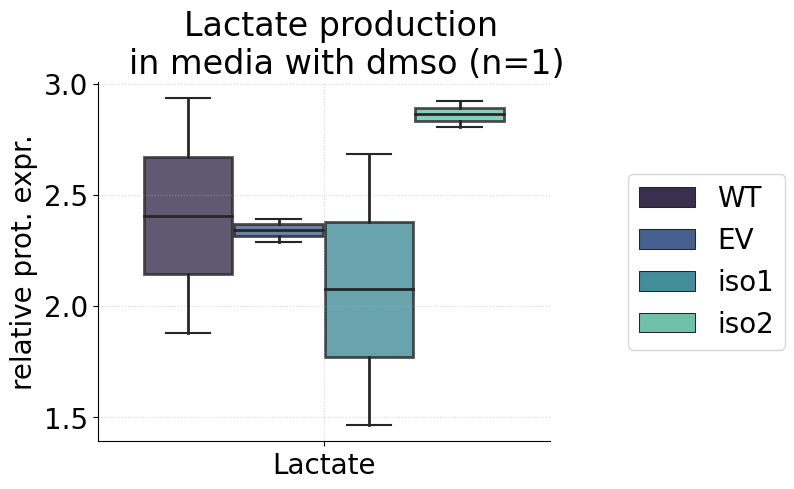

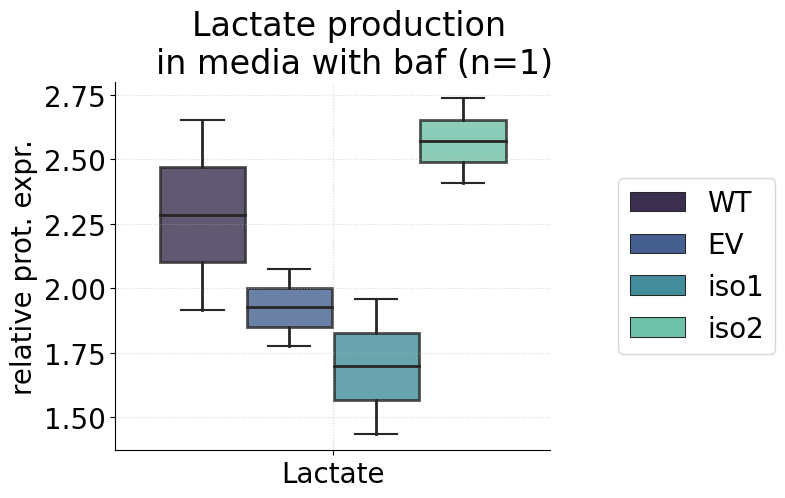

In [12]:
dfs = dfs_lact_dmso, dfs_lact_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df['value'] = df['value'].astype(float)
    df['x'] = 'Lactate'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Lactate production \nin media with '+ info + ' (n=1)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))   